In [78]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
%matplotlib inline

## Частный случайн центральной предельной теоремы

Если  - X1,X2,...,Xn независимые случайные величины, имеющие один и тот же закон распределения 
с математическим ожиданием EX и дисперсией DX, то при неограниченном увеличении  закон распределения суммы
<img src="../img/blabla.gif" alt="lokh" height="100" width="100">
неограниченно приближается к нормальному.

Применим эту логику в выборочному среднему X_mean =(x1+x2+…+xn)/n. Это тоже случайная величина, она каждый раз меняется, когда мы создаём новую выборку, в отличие от EX, которая не меняется.

Закон больших чисел учит нас, что если n достаточно большое, то X_mean становится близко к EX. Чем больше n, тем меньше отклонение

In [82]:
df = pd.read_csv('../data/insurance.csv')

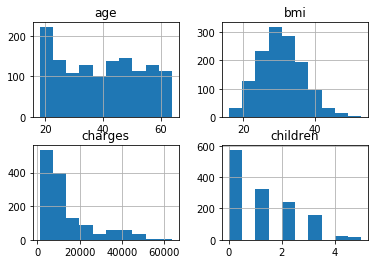

In [83]:
df.hist();

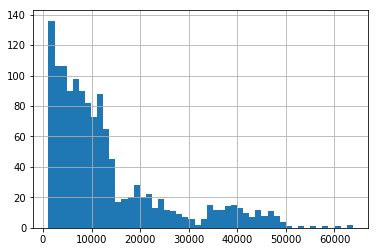

In [84]:
df['charges'].hist(bins=50);

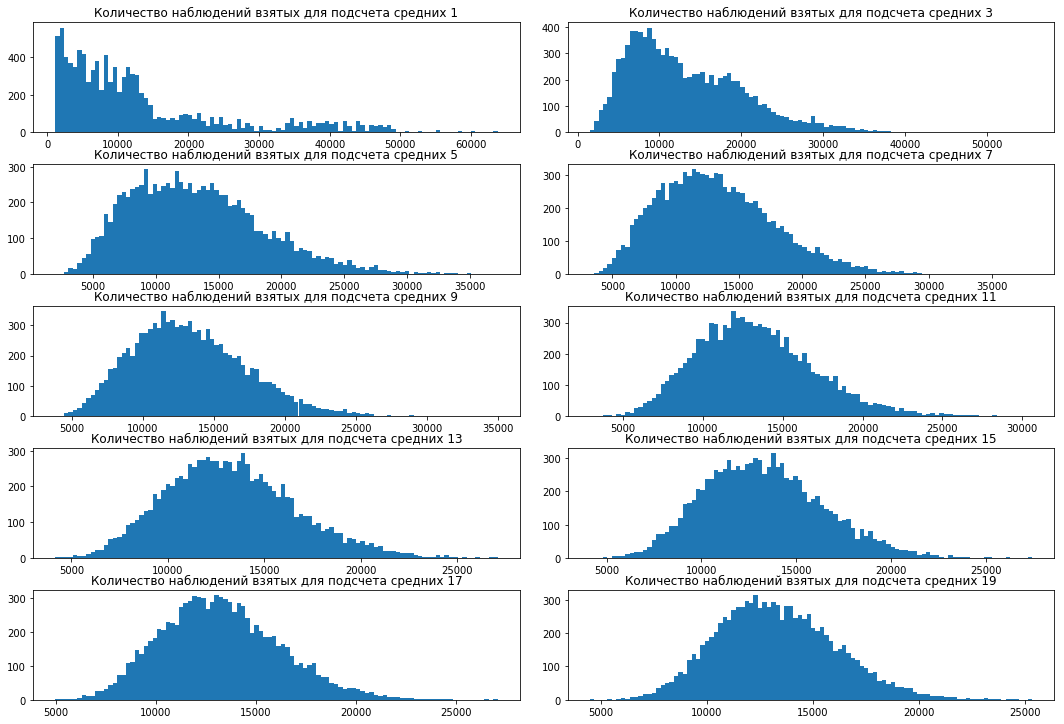

In [86]:
arr = np.arange(1,20,2)

fig, ax = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(15, 10)
fig.tight_layout()
i=0
for row in ax:
    for col in row:
        data = np.random.choice(df['charges'].values,size=(10000,arr[i]),replace=True).mean(axis=1)
        col.hist(data,bins=100)
        col.set_title('Количество наблюдений взятых для подсчета средних {0}'.format(arr[i]))
        i+=1

## Доверительные интервалы

Они нужны для того чтобы понимать в пределах какого интервала может варьироваться наша выборочная оценка, так как она случайна и только приближается к истиной оценке распределения.<br>
Интервальная оценка истиного значения theta это числовой интервал (theta1,theta2), который с заданной вероятностью накрывает неизвестное значение параметра theta.
<img src="../img/thera.png" alt="lokh" height="300" width="300">

Важно понимать что границы интервала это случайные величины а истиное значение нет.
Величина доверительного интервала зависит от величины выборки n (чем больше n тем уже интервал), от доверительной вероятности (1-a) (чем больше доверительная вероятность тем шире интервал)

А за счет ЦПТ мы можем строить доверительные интервалы для средних из не сильно скошенных относительно нормального распределения выборок
<img src="../img/x_mean_norm.png" alt="lokh" height="200" width="200">
Одной и той же формулой:
<img src="../img/intervals_formula.png" alt="lokh" height="400" width="500">
Но как вы заметили в этой формуле присутствует DX, которую мы по факту не знаем, для этого мы заменяем ее на лучшую оценку - выборочную дисперсию и тогда используем t статистику из распределения Стьюдента вместо Z статистики. Получаем по итогу вот такую формулу которой будем пользоваться для интервальных оценок средних.
$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [87]:
from statsmodels.stats.weightstats import _tconfint_generic

In [88]:
female = df[df['sex'] == 'female']['charges']
male = df[df['sex'] == 'male']['charges']

In [89]:
female.shape, male.shape

((662,), (676,))

In [90]:
male.mean(), female.mean()

(13956.751177721893, 12569.578843835347)

Возьмем подвыборку из выборки

In [91]:
mini_sample = np.random.choice(male,size=200)

In [92]:
mini_sample.mean()

12509.247383599999

Получили другую среднюю, хотя это по сути в рамках статистики обе этих выборки - выборки, и они равноправны, вот для того чтобы оценивать в каких пределах может варьироваться выборочная средняя и нужна интервальная оценка.

In [93]:
male_mean = male.mean()
male_mean_std = male.std()/sqrt(len(male))

female_mean = female.mean()
female_mean_std = female.std()/sqrt(len(female))

Так же при проведении интервальной оценки нужно указать альтернативу, их 3 вида:
<ul>
    <li>меньше</li>
    <li>больше</li>
    <li>двусторонняя</li>
</ul>
Что все это значит? Лишь то что в случае с двусторонней альтернативой мы допускаем что истинное <br>
матожидание может быть как больше так и меньше чем полученная оценка, поскольку учитываем любую возможность, такой подход рекомендуется,
поскольку редко есть уверенность заранее в направлении какого-либо различия, если таковое существует.
В некоторых случаях можно использовать одностороннюю альтернативу, но только тогда когда мы уверены в том что истинное матожидание
точно меньше или больше выборочной оценки.

В целом в быту можно использовать просто двустороннюю альтернативу, не ошибетесь.

In [94]:
from scipy.stats import t
t_stat = t.ppf(1 - 0.05/2,len(male) - 1)

male_mean - t_stat * male_mean_std, male_mean + t_stat * male_mean_std

(12977.196929471213, 14936.305425972574)

In [95]:
male_interval = _tconfint_generic(male_mean, male_mean_std, len(male) - 1,0.05,alternative='two-sided')
female_interval = _tconfint_generic(female_mean, female_mean_std, len(female) - 1,0.05,alternative='two-sided')

print('95% confidence interval of medical charges for male: ',male_interval)
print('interval size for male: ', male_interval[1] - male_interval[0])

print('95% confidence interval of medical charges for female ',female_interval)
print('interval size for male: ', female_interval[1] - female_interval[0])

95% confidence interval of medical charges for male:  (12977.196929471213, 14936.305425972574)
interval size for male:  1959.1084965013615
95% confidence interval of medical charges for female  (11720.28177548769, 13418.875912183003)
interval size for male:  1698.594136695312


In [96]:
male_interval = _tconfint_generic(male_mean, male_mean_std, len(male) - 1,0.2,alternative='two-sided')
female_interval = _tconfint_generic(female_mean, female_mean_std, len(female) - 1,0.2,alternative='two-sided')

print('80% confidence interval of medical charges for male: ',male_interval)
print('interval size for male: ', male_interval[1] - male_interval[0])

print('80% confidence interval of medical charges for female ',female_interval)
print('interval size for male: ', female_interval[1] - female_interval[0])

80% confidence interval of medical charges for male:  (13316.777212809062, 14596.725142634725)
interval size for male:  1279.9479298256629
80% confidence interval of medical charges for female  (12014.715636891246, 13124.442050779448)
interval size for male:  1109.726413888202
